# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regreción Lineal: Lección 8 - Encoding**
---

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

En el pair programming de hoy usaremos el set de datos que guardastéis en el pair programming de normalización y estandarización.  

Vuestro set de datos debería tener al menos una variable categórica, el objetivo del pair programming de hoy:  

In [5]:
df = pd.read_csv("datos/soci_econ_country_profiles_estandarizado.csv", index_col = 0)
df.head(2)

,country,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock,restaurant_price_index_normal
0,Argentina,SouthAmerica,50.37,0.432582,-0.331263,0.131944,0.315638,0.258824,-0.022740,-0.243315,-1.258757,0.080347,-0.036551,-0.572700,0.374915,0.605509,0.927114,-0.437736,-0.307692,4.246653
1,Australia,Oceania,77.12,0.095085,-0.273292,-0.368056,0.487805,0.211765,0.550795,0.660990,-0.139554,0.893666,0.102195,0.566766,-0.030665,0.393466,0.239067,-0.015094,1.538462,4.749998


- Hacer una códificación de la/las variables categóricas que tengáis en vuestro set de datos. Recordad que lo primero que deberéis hacer es decidir su vuestras variables tienen o no orden, para que en función de esto uséis una aproximación u otra.

Como en ANOVA hemos visto que la variable 'region' afecta a la variable respuesta la consideramos ordinaria.

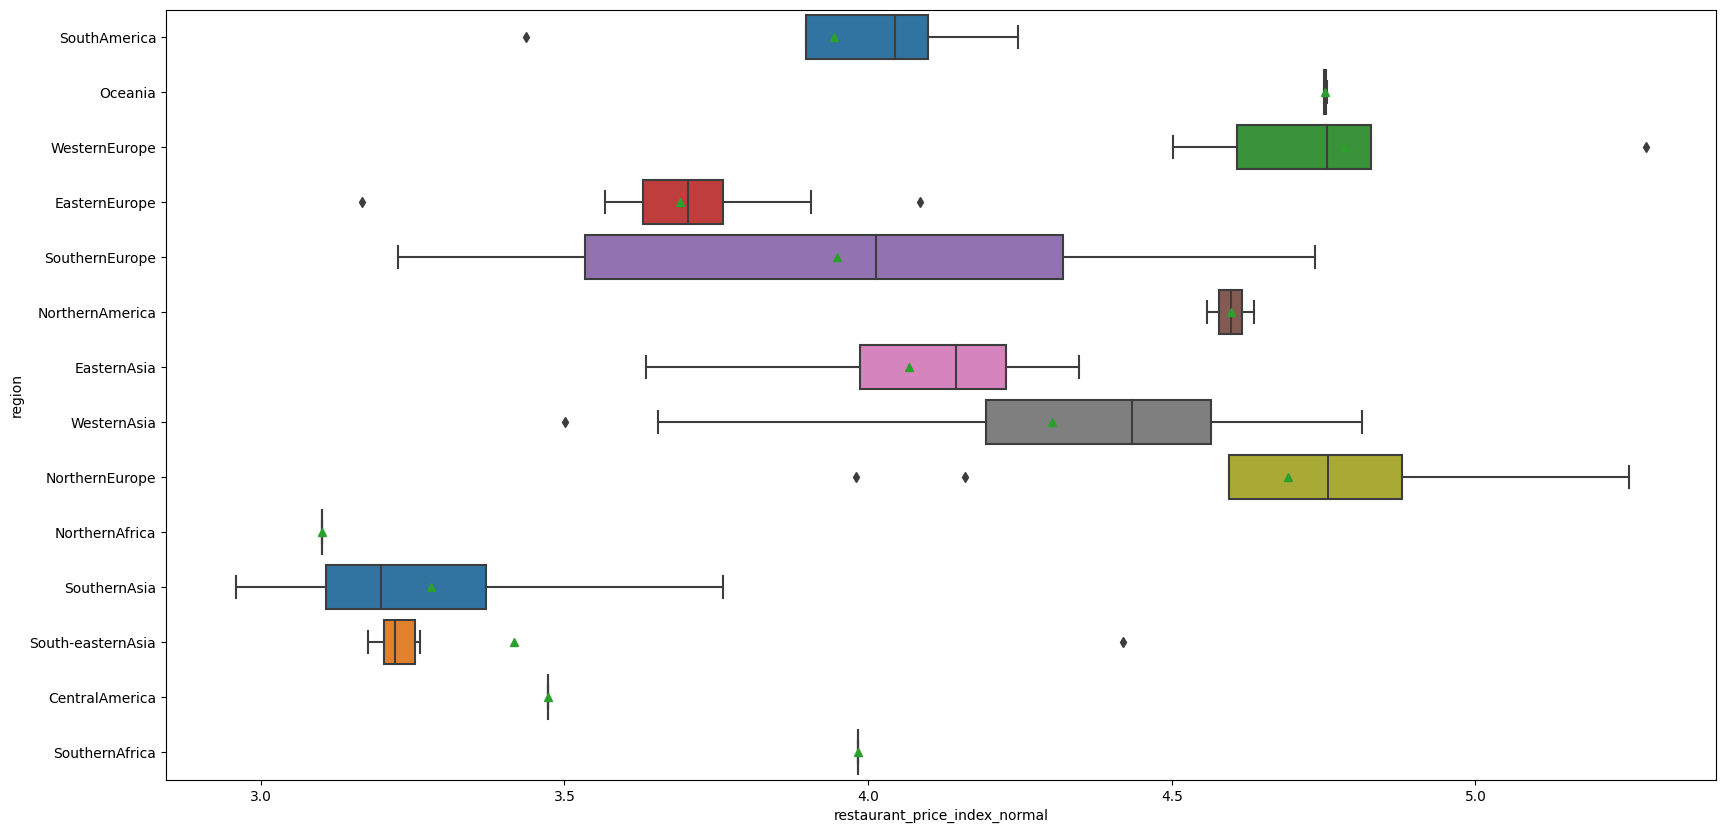

In [6]:
# para la columna categórica utilizamos boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(y= 'region', x= 'restaurant_price_index_normal', data = df, palette = 'tab10', showmeans=True);

### Enconding con ordinal encoder

In [7]:
orden_regiones = ['NorthernAfrica', 'SouthernAsia', 'South-easternAsia', 'CentralAmerica', 'EasternEurope', 'SouthernAfrica', 'SouthernEurope', 'SouthAmerica', 'EasternAsia',
                  'WesternAsia', 'NorthernAmerica', 'Oceania', 'WesternEurope', 'NorthernEurope']

In [8]:
def ordinal_encoder1(df, columna, orden_valores):
    
    # iniciamos el método y aplicamos la transformación a los datos. 
    ordinal = OrdinalEncoder(categories = [orden_valores], dtype = int)

    transformados_oe = ordinal.fit_transform(df[[columna]])
    
    # lo convertimos a dataframe
    oe_df = pd.DataFrame(transformados_oe)
    # cambiamos el nombre de la columna
    oe_df.columns = ordinal.feature_names_in_

    columna += "_oe"
    
    # sobre escribimos la columna con los valores de la tranformación
    df[columna] = oe_df
     
    return df

In [9]:
df_encoding = ordinal_encoder1(df, 'region', orden_regiones)
df_encoding.head()

,country,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock,restaurant_price_index_normal,region_oe
0,Argentina,SouthAmerica,50.37,0.432582,-0.331263,0.131944,0.315638,0.258824,-0.022740,-0.243315,-1.258757,0.080347,-0.036551,-0.572700,0.374915,0.605509,0.927114,-0.437736,-0.307692,4.246653,7
1,Australia,Oceania,77.12,0.095085,-0.273292,-0.368056,0.487805,0.211765,0.550795,0.660990,-0.139554,0.893666,0.102195,0.566766,-0.030665,0.393466,0.239067,-0.015094,1.538462,4.749998,11
2,Austria,WesternEurope,66.94,-0.172512,-0.107660,0.243056,0.120516,0.352941,0.765464,0.530557,1.143569,0.629026,0.018589,0.507418,0.030085,-0.615413,-0.332362,0.294340,0.694280,4.581754,12
3,Belarus,EasternEurope,37.60,-0.160047,0.298137,1.131944,-0.527977,0.070588,-0.338766,-0.699621,0.976879,-0.461962,1.234337,-0.077916,1.839723,0.111590,-0.029155,0.007547,0.213018,3.906126,4
4,Belgium,WesternEurope,82.34,-0.126655,-0.397516,-0.368056,0.573888,0.870588,0.302134,0.434187,-0.255296,0.740210,-0.024568,0.293769,0.050562,0.830865,0.017493,0.256604,0.284024,4.828160,12


In [10]:
df_encoding.region_oe.unique()

array([ 7, 11, 12,  4,  6, 10,  8,  9, 13,  0,  1,  2,  3,  5])

### Enconding con map

Como vemos en el boxplot las diferencias entre las medianas de las categorías son muy variables, por lo que no son coherentes con un salto de 1 ud numérica de cada categoría a la siguiente. Por eso nos parece que un map usando los valores de las medianas de cada categoría es la aproximación más adecuada. 

In [11]:
medianas = df.groupby('region')['restaurant_price_index_normal'].median().reset_index().sort_values(by='restaurant_price_index_normal')
medianas

,region,restaurant_price_index_normal
3,NorthernAfrica,3.100294
10,SouthernAsia,3.198339
7,South-easternAsia,3.221388
0,CentralAmerica,3.473377
2,EasternEurope,3.703008
9,SouthernAfrica,3.983642
11,SouthernEurope,4.013308
8,SouthAmerica,4.043640
1,EasternAsia,4.145547
12,WesternAsia,4.435114


In [12]:
mapa = {'NorthernAfrica': medianas.iloc[0,1], 'SouthernAsia': medianas.iloc[1,1], 'South-easternAsia': medianas.iloc[2,1], 'CentralAmerica': medianas.iloc[3,1], 'EasternEurope': medianas.iloc[4,1],
        'SouthernAfrica': medianas.iloc[5,1], 'SouthernEurope': medianas.iloc[6,1], 'SouthAmerica': medianas.iloc[7,1], 'EasternAsia': medianas.iloc[8,1], 'WesternAsia': medianas.iloc[9,1], 
        'NorthernAmerica': medianas.iloc[10,1], 'Oceania': medianas.iloc[11,1], 'WesternEurope': medianas.iloc[12,1], 'NorthernEurope': medianas.iloc[13,1]}

In [13]:
df["region_map"] = df["region"].map(mapa)
df.head()

,country,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock,restaurant_price_index_normal,region_oe,region_map
0,Argentina,SouthAmerica,50.37,0.432582,-0.331263,0.131944,0.315638,0.258824,-0.022740,-0.243315,-1.258757,0.080347,-0.036551,-0.572700,0.374915,0.605509,0.927114,-0.437736,-0.307692,4.246653,7,4.043640
1,Australia,Oceania,77.12,0.095085,-0.273292,-0.368056,0.487805,0.211765,0.550795,0.660990,-0.139554,0.893666,0.102195,0.566766,-0.030665,0.393466,0.239067,-0.015094,1.538462,4.749998,11,4.752619
2,Austria,WesternEurope,66.94,-0.172512,-0.107660,0.243056,0.120516,0.352941,0.765464,0.530557,1.143569,0.629026,0.018589,0.507418,0.030085,-0.615413,-0.332362,0.294340,0.694280,4.581754,12,4.754992
3,Belarus,EasternEurope,37.60,-0.160047,0.298137,1.131944,-0.527977,0.070588,-0.338766,-0.699621,0.976879,-0.461962,1.234337,-0.077916,1.839723,0.111590,-0.029155,0.007547,0.213018,3.906126,4,3.703008
4,Belgium,WesternEurope,82.34,-0.126655,-0.397516,-0.368056,0.573888,0.870588,0.302134,0.434187,-0.255296,0.740210,-0.024568,0.293769,0.050562,0.830865,0.017493,0.256604,0.284024,4.828160,12,4.754992


In [14]:
# eliminamos la columna que no vamos a usar:
df.drop(columns='region_oe', inplace=True)
df.sample()

,country,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock,restaurant_price_index_normal,region_map
16,Denmark,NorthernEurope,101.01,-0.22363,-0.298137,-0.645833,0.619799,1.811765,0.680869,0.594943,1.039457,0.961998,-0.247367,0.394659,-0.397815,0.460689,-0.052478,0.309434,0.110454,5.073385,4.756654


- Guardad el dataframe, donde deberíais tener las variables estadandarizas, normalizadas y codificadas en un csv para usarlo en el próximo pairprogramming

In [15]:
df.to_csv("datos/soci_econ_country_profiles_encoding.csv")